<h1 align="center"> Assignment 4: Clustering</h1><br>

In [33]:
import numpy as np
import glob
import pandas as pd

import h5py as h5
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, SelectKBest
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR, LinearSVR
from sklearn import preprocessing
import calendar as cal
import seaborn as sns
import datetime as dt
%matplotlib inline

In [34]:
from pandas import HDFStore
store = HDFStore('/Users/mgalarny/Desktop/MachineLearningProject/yogurt.h5')
store.keys()

['/delivery_stores', '/demos', '/drug', '/groc', '/panel']

<strong><p style="font-size:120%;">Loading the Data </strong> My group has merged all the csv files into one H5 File

In [35]:
demo = pd.read_hdf('/Users/mgalarny/Desktop/MachineLearningProject/yogurt.h5','demos')
demo.columns

Index([u'ALL_TVS', u'Age Group Applied to Female HH',
       u'Age Group Applied to Male HH', u'CABL_TVS', u'COUNTY',
       u'Children Group Code', u'Combined Pre-Tax Income of HH', u'EXT_FACT',
       u'Education Level Reached by Female HH',
       u'Education Level Reached by Male HH', u'FIPSCODE', u'Family Size',
       u'Female Working Hour Code', u'HH_AGE', u'HH_EDU', u'HH_OCC',
       u'HH_RACE', u'IRI Geography Number', u'Language',
       u'Male Working Hour Code', u'Marital Status', u'Number of Cats',
       u'Number of Dogs', u'Occupation Code of Female HH',
       u'Occupation Code of Male HH', u'Panelist ID', u'RACE3',
       u'Type of Residential Possession', u'Year', u'ZIPCODE', u'filename',
       u'yearID'],
      dtype='object')

<strong><p style="font-size:120%;">Inspecting the Data</strong> Looking for columns with NaNs in them

In [36]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74592 entries, 0 to 4606
Data columns (total 32 columns):
ALL_TVS                                 57426 non-null float64
Age Group Applied to Female HH          74592 non-null int64
Age Group Applied to Male HH            74592 non-null int64
CABL_TVS                                54537 non-null float64
COUNTY                                  46722 non-null object
Children Group Code                     74592 non-null int64
Combined Pre-Tax Income of HH           74581 non-null float64
EXT_FACT                                46722 non-null float64
Education Level Reached by Female HH    74592 non-null int64
Education Level Reached by Male HH      74592 non-null int64
FIPSCODE                                46722 non-null float64
Family Size                             74592 non-null int64
Female Working Hour Code                74592 non-null int64
HH_AGE                                  46627 non-null float64
HH_EDU                   

<strong><p style="font-size:120%;">Look at Documentation </strong> Specifically pg 26-27 of the Research and Development data set and field description

In [37]:
demo.columns

Index([u'ALL_TVS', u'Age Group Applied to Female HH',
       u'Age Group Applied to Male HH', u'CABL_TVS', u'COUNTY',
       u'Children Group Code', u'Combined Pre-Tax Income of HH', u'EXT_FACT',
       u'Education Level Reached by Female HH',
       u'Education Level Reached by Male HH', u'FIPSCODE', u'Family Size',
       u'Female Working Hour Code', u'HH_AGE', u'HH_EDU', u'HH_OCC',
       u'HH_RACE', u'IRI Geography Number', u'Language',
       u'Male Working Hour Code', u'Marital Status', u'Number of Cats',
       u'Number of Dogs', u'Occupation Code of Female HH',
       u'Occupation Code of Male HH', u'Panelist ID', u'RACE3',
       u'Type of Residential Possession', u'Year', u'ZIPCODE', u'filename',
       u'yearID'],
      dtype='object')

<strong><p style="font-size:120%;">Drop Non Useful Columns </strong>

In [38]:
try: 
    demo = demo.drop(['EXT_FACT', 'ZIPCODE', 'ALL_TVS', \
                      'CABL_TVS', 'FIPSCODE', 'IRI Geography Number', \
                      'ZIPCODE', 'filename', 'RACE3', \
                      'Year', 'Panelist ID', 'COUNTY', \
                      'yearID', 'HH_AGE', 'HH_EDU', \
                      'HH_RACE', 'HH_OCC', 'Language', \
                      'Occupation Code of Female HH', \
                      'Occupation Code of Male HH'], axis=1)
except: 
    pass

demo.tail()

,Age Group Applied to Female HH,Age Group Applied to Male HH,Children Group Code,Combined Pre-Tax Income of HH,Education Level Reached by Female HH,Education Level Reached by Male HH,Family Size,Female Working Hour Code,Male Working Hour Code,Marital Status,Number of Cats,Number of Dogs,Type of Residential Possession
4602,4,7,8,1.0,3,0,1,3,4,3,0,0,2
4603,6,6,8,9.0,4,4,2,3,3,1,0,0,1
4604,6,6,8,5.0,4,5,2,3,3,1,0,0,1
4605,6,6,8,7.0,3,3,2,3,3,1,0,0,1
4606,4,7,3,8.0,5,0,3,2,4,3,0,0,2


In [39]:
drop_reasons = {'Column': ['EXT_FACT', 'ZIPCODE', 'ALL_TVS', \
            'CABL_TVS', 'FIPSCODE', 'IRI Geography Number', \
            'Language', 'ZIPCODE', 'filename', \
            'RACE3', 'Year','Panelist ID', \
            'COUNTY', 'yearID', 'HH_AGE', \
            'HH_EDU', 'HH_OCC', 'Language', \
            'Occupation Code of Female HH', 'Occupation Code of Male HH'], \
'Reason for Dropping': \
             ['equal market/demo weight is too strongly correlated with other variables', \
             'Too many different zipcodes', 'Not alot of documentation', 'Not interested', \
             'Each is unique', 'Geography isn\'t of interest', 'Language is too highly correlated to race (HH_RACE)', \
             'Unique', 'Not Relevant', 'Too Many NaNs', \
             'not interesting', 'unique', 'Not sure I should have dropped this', 'Already dropped year', \
             'NaNs, may add later after initial analysis', 'may add later after initial analysis', \
             'may add later after initial analysis', 'may add later after initial analysis', \
             'Already have college and salary', 'Already have college and salary']}

pd.DataFrame(data = drop_reasons)

,Column,Reason for Dropping
0,EXT_FACT,equal market/demo weight is too strongly corre...
1,ZIPCODE,Too many different zipcodes
2,ALL_TVS,Not alot of documentation
3,CABL_TVS,Not interested
4,FIPSCODE,Each is unique
5,IRI Geography Number,Geography isn't of interest
6,Language,Language is too highly correlated to race (HH_...
7,ZIPCODE,Unique
8,filename,Not Relevant
9,RACE3,Too Many NaNs


<strong><p style="font-size:120%;">Feature Engineering </strong> A good part of this was transforming the values to be more understandable for clustering later on. 

In [40]:
# Making Numbers Easier to interpret for Clustering Analysis


age_dict = {0: 'N/A', 
                  1: '18-24',
                  2: '25-34',
                  3: '35-44',
                  4: '45-54',
                  5: '55-64',
                  6: '65 +',
                  7: 'No such person'}

edu_dict = {0: 'N/A', 
            1: 'Some grade school or less',
            2: 'Completed grade school',
            3: 'Some high school',
            4: 'Graduated high school',
            5: 'Technical school',
            6: 'Some college',
            7: 'Graduated from college',
            8: 'Post graduate work',
            9: 'No such head of household'}

pre_tax_income_dict = {0: 'N/A',
                  1: '$00,000 to $ 9,999 per yr',
                  2: '$10,000 to $11,999 per yr',
                  3: '$12,000 to $14,999 per yr',
                  4: '$15,000 to $19,999 per yr',
                  5: '$20,000 to $24,999 per yr',
                  6: '$25,000 to $34,999 per yr',
                  7: '$35,000 to $44,999 per yr',
                  8: '$45,000 to $54,999 per yr',
                  9: '$55,000 to $64,999 per yr',
                  10: '$65,000 to $74,999 per yr', 
                  11: '$75,000 to $99,999 per yr', 
                  12: '$100,000 and greater per year'}

working_hour_dict = {0: 'N/A', 
                     1: 'Not employed',
                     2: 'Part time, < 35 hrs./wk.',
                     3: 'Full time, > 35 hrs./wk.',
                     4: 'Retired',
                     5: 'Homemaker',
                     6: 'Some college',
                     7: 'N/A'}

marital_status_dict = {0: 'N/A',
                       1: 'Single',
                       2: 'Married',
                       3: 'Divorced',
                       4: 'Widowed',
                       5: 'Separated'}

child_group_dict = {0: 'N/A',
                    1: 'Child in [0-5)',
                    2: 'Child in [6-11)',
                    3: 'Child in [12-17)',
                    4: 'Children in [0-5) & [6-11)',
                    5: 'Children in [0-5) & [12-17)', 
                    6: 'Children in [6-11) & [1217)',
                    7: 'Children in [0-5),[6-11) & [12-17)',
                    8: 'Family size>0 yet no children'}

residental_possession_dict = {0: 'N/A',
                              1: 'Renter',
                              2: 'Owner'}

In [41]:
def handler(dictionary,key):
    # function to deal with nans and unidenified dictionary keys
    try:
        value = dictionary[key]
    except: 
        value = dictionary[0]
    return value
    

In [42]:
demo['Age Group Applied to Female HH']= demo['Age Group Applied to Female HH'].apply(lambda x: age_dict[x] )
demo['Age Group Applied to Male HH']= demo['Age Group Applied to Male HH'].apply(lambda x: age_dict[x] )
demo['Education Level Reached by Female HH']= demo['Education Level Reached by Female HH'].apply(lambda x: handler(edu_dict,x))
demo['Education Level Reached by Male HH']= demo['Education Level Reached by Male HH'].apply(lambda x: handler(edu_dict,x))
demo['Combined Pre-Tax Income of HH']= demo['Combined Pre-Tax Income of HH'].apply(lambda x: handler(pre_tax_income_dict,x))

In [43]:
demo['Male Working Hour Code']= demo['Male Working Hour Code'].apply(lambda x: handler(working_hour_dict,x))
demo['Female Working Hour Code']= demo['Female Working Hour Code'].apply(lambda x: handler(working_hour_dict,x))
demo['Marital Status']= demo['Marital Status'].apply(lambda x: handler(marital_status_dict,x))
demo['Children Group Code']= demo['Children Group Code'].apply(lambda x: handler(child_group_dict,x))
demo['Type of Residential Possession']= demo['Type of Residential Possession'].apply(lambda x: handler(residental_possession_dict,x))

In [44]:
demo.columns

Index([u'Age Group Applied to Female HH', u'Age Group Applied to Male HH',
       u'Children Group Code', u'Combined Pre-Tax Income of HH',
       u'Education Level Reached by Female HH',
       u'Education Level Reached by Male HH', u'Family Size',
       u'Female Working Hour Code', u'Male Working Hour Code',
       u'Marital Status', u'Number of Cats', u'Number of Dogs',
       u'Type of Residential Possession'],
      dtype='object')

In [45]:
demo.head(3)

,Age Group Applied to Female HH,Age Group Applied to Male HH,Children Group Code,Combined Pre-Tax Income of HH,Education Level Reached by Female HH,Education Level Reached by Male HH,Family Size,Female Working Hour Code,Male Working Hour Code,Marital Status,Number of Cats,Number of Dogs,Type of Residential Possession
0,65 +,65 +,Family size>0 yet no children,"$12,000 to $14,999 per yr",Some high school,Completed grade school,3,Retired,Retired,Married,0,0,Owner
1,55-64,No such person,Child in [12-17),"$20,000 to $24,999 per yr",Graduated from college,No such head of household,2,"Full time, > 35 hrs./wk.",Homemaker,Single,2,0,Owner
2,65 +,65 +,Family size>0 yet no children,"$45,000 to $54,999 per yr",Some college,Technical school,2,"Full time, > 35 hrs./wk.",Retired,Married,0,1,Owner


In [46]:
prefixes = {'Age Group Applied to Female HH': 'Age Female HH ', 
            'Age Group Applied to Male HH': 'Age Male HH ', 
            'Children Group Code': 'Children Code ', 
            'Combined Pre-Tax Income of HH': 'Pre-Tax Income ', 
            'Education Level Reached by Female HH': 'Female Education Level ', 
            'Education Level Reached by Male HH': 'Male Education Level ', 
            'Family Size': 'Family Size of ', 
            'Female Working Hour Code': 'Female Working Hours ', 
            'Male Working Hour Code': 'Male Working Hours', 
            'Marital Status': 'Marital Status ', 
            'Number of Cats': 'Number of Cats ', 
            'Number of Dogs': 'Number of Dogs ', 
            'Type of Residential Possession': 'Type of Residential Possession '
}

better_demo = pd.concat([pd.get_dummies(demo[col], prefix = prefixes[col]) for index,col in enumerate(demo)], axis=1)

In [47]:
better_demo.head(2)

,Age Female HH _18-24,Age Female HH _25-34,Age Female HH _35-44,Age Female HH _45-54,Age Female HH _55-64,Age Female HH _65 +,Age Female HH _N/A,Age Female HH _No such person,Age Male HH _18-24,Age Male HH _25-34,...,Number of Cats _5,Number of Dogs _0,Number of Dogs _1,Number of Dogs _2,Number of Dogs _3,Number of Dogs _4,Number of Dogs _5,Type of Residential Possession _N/A,Type of Residential Possession _Owner,Type of Residential Possession _Renter
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
better_demo.columns

Index([u'Age Female HH _18-24', u'Age Female HH _25-34',
       u'Age Female HH _35-44', u'Age Female HH _45-54',
       u'Age Female HH _55-64', u'Age Female HH _65 +', u'Age Female HH _N/A',
       u'Age Female HH _No such person', u'Age Male HH _18-24',
       u'Age Male HH _25-34',
       ...
       u'Number of Cats _5', u'Number of Dogs _0', u'Number of Dogs _1',
       u'Number of Dogs _2', u'Number of Dogs _3', u'Number of Dogs _4',
       u'Number of Dogs _5', u'Type of Residential Possession _N/A',
       u'Type of Residential Possession _Owner',
       u'Type of Residential Possession _Renter'],
      dtype='object', length=102)

In [49]:
from sklearn.decomposition import PCA
p_mdl = PCA(whiten=True)
p_mdl.fit(better_demo)

PCA(copy=True, n_components=None, whiten=True)

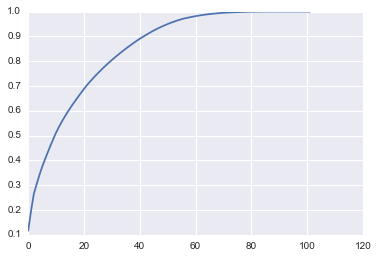

In [50]:
plt.plot(np.cumsum(p_mdl.explained_variance_ratio_))

In [51]:
var_explained = np.cumsum(p_mdl.explained_variance_ratio_)
num_comp = sum(var_explained < 0.95)
print num_comp
var_explained[:num_comp]

51


array([ 0.11685524,  0.19493658,  0.26403715,  0.30300055,  0.34044208,
        0.37394079,  0.40375097,  0.43216653,  0.45990293,  0.48653894,
        0.51207514,  0.53467297,  0.5552073 ,  0.57439756,  0.59280585,
        0.60990627,  0.62674614,  0.64259713,  0.65807915,  0.67333677,
        0.68812559,  0.70256951,  0.71568599,  0.72810685,  0.7401572 ,
        0.75178419,  0.76317775,  0.7742671 ,  0.78469503,  0.79497444,
        0.80490991,  0.81454995,  0.82386137,  0.83307791,  0.84197604,
        0.85068602,  0.85905778,  0.86718628,  0.87525059,  0.8831565 ,
        0.89041619,  0.89750759,  0.90433631,  0.91096671,  0.91742687,
        0.92368924,  0.92950893,  0.93510143,  0.9402187 ,  0.9451637 ,
        0.94988857])

In [52]:
p_mdl.components_.shape

(102, 102)

In [53]:
 #Compute the norms of each feature in the new space
n = better_demo.shape[1]
norms = np.zeros(n)
for i in xrange(n):
    norms[i] = np.linalg.norm(p_mdl.components_[:num_comp,i])**2
norms

array([  5.78003947e-01,   6.09573816e-01,   8.20612274e-01,
         7.90731218e-01,   7.77400612e-01,   7.77934000e-01,
         3.28065001e-05,   3.23006732e-01,   1.54399527e-01,
         3.45785023e-01,   7.94266434e-01,   7.76719503e-01,
         7.53355275e-01,   7.31335318e-01,   6.18676883e-02,
         3.75718215e-01,   3.97512860e-02,   7.58325676e-01,
         7.16953892e-01,   2.81051941e-04,   2.37072937e-02,
         1.83744508e-03,   4.15297075e-01,   6.45044447e-01,
         1.07672380e-04,   8.57242335e-01,   1.10854315e-01,
         7.49460853e-01,   4.37126518e-01,   9.00706434e-01,
         9.08460382e-01,   9.15615853e-01,   9.12065405e-01,
         8.95955058e-01,   8.83775055e-01,   8.46878788e-01,
         8.51090879e-01,   5.69036719e-04,   3.80901245e-03,
         8.36562252e-01,   8.32721186e-01,   3.97698326e-01,
         3.40339875e-01,   5.23812338e-01,   8.40933536e-01,
         4.63329415e-04,   7.59922610e-01,   8.33708147e-01,
         2.67483763e-03,

In [54]:
# Get the most important features
norm_list = list(norms)
pca_feature_list = set()
for idx in sorted(norms,reverse=True)[:num_comp]:
    print better_demo.columns[norm_list.index(idx)],'-',idx
    pca_feature_list.add(better_demo.columns[norm_list.index(idx)])

Pre-Tax Income _$25,000 to $34,999 per yr - 0.915615853439
Pre-Tax Income _$35,000 to $44,999 per yr - 0.912065405265
Pre-Tax Income _$20,000 to $24,999 per yr - 0.908460382035
Pre-Tax Income _$15,000 to $19,999 per yr - 0.900706433923
Pre-Tax Income _$45,000 to $54,999 per yr - 0.895955057785
Pre-Tax Income _$55,000 to $64,999 per yr - 0.883775054547
Pre-Tax Income _$00,000 to $ 9,999 per yr - 0.85724233461
Pre-Tax Income _$75,000 to $99,999 per yr - 0.851090879147
Pre-Tax Income _$65,000 to $74,999 per yr - 0.846878787693
Female Education Level _Some college - 0.840933536205
Male Education Level _Some college - 0.840466625257
Male Education Level _Graduated from college - 0.836826033979
Female Education Level _Graduated from college - 0.836562252272
Male Education Level _Graduated high school - 0.836295712453
Male Education Level _Technical school - 0.835873212644
Female Education Level _Technical school - 0.833708146845
Female Education Level _Graduated high school - 0.832721186487


In [55]:
pca_top_better_demo = better_demo[list(pca_feature_list)]
pca_top_better_demo.to_csv('pca_top_fe_demos.csv', index=False)

In [56]:
plt_pcl = PCA(n_components=3)
fe_pd_2d = plt_pcl.fit_transform(pca_top_better_demo)

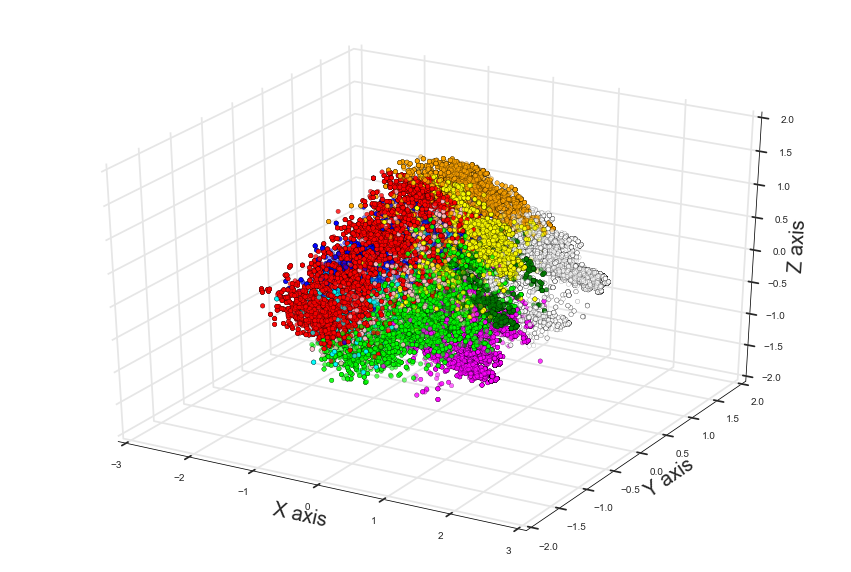

In [89]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10)).gca(projection='3d')

fe_pd_2d_df = pd.DataFrame(fe_pd_2d, columns=['x','y','z'])

km_mdl = KMeans(n_clusters=10)
fe_pd_2d_df['clust'] = km_mdl.fit_predict(pca_top_better_demo)

c = {0: '#FF0000', 
     1: '#FFFF00',
     2: '#008000',
     3: '#0000FF',
     4: '#FF00FF',
     5: '#00FFFF',
     6: '#FFC0CB',
     7: '#00FF00',
     8: '#FFFFFF',
     9: '#FFA500'}

# cluster 0 is red 
# cluster 1 is yellow #FFFF00
# cluster 2 is dark green #008000
# cluster 3 is dark blue #0000FF
# cluster 4 is fuchsia #FF00FF
# cluster 5 is aqua #00FFFF
# cluster 6 is pink #FFC0CB
# cluster 7 is lime (0,1,0) #00FF00
# cluster 8 is white #FFFFFF
# cluster 9 is orange #FFA500

# web colors https://en.wikipedia.org/wiki/Web_colors

lama = pd.DataFrame(data = fe_pd_2d_df['clust'])
lama.clust.apply(lambda x: c[x])

fig.scatter(fe_pd_2d_df['x'], fe_pd_2d_df['y'], fe_pd_2d_df['z'], c=lama.clust.apply(lambda x: c[x]))
fig.patch.set_facecolor('white')
#ax = plt.subplot(111)
ax = plt.gca()
ax.set_axis_bgcolor('white')

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_xaxis.set_label_text('X axis', fontsize = 20);
ax.w_yaxis.set_label_text('Y axis', fontsize = 20);
ax.w_zaxis.set_label_text('Z axis', fontsize = 20);

### Top Features that define each cluster

In [62]:
order_centroids = km_mdl.cluster_centers_.argsort()[:, ::-1]
for clust in xrange(km_mdl.n_clusters):
    print "Cluster %d:" % clust
    for feat in sorted(pca_top_better_demo.columns[order_centroids[clust, :8]].values.tolist()):
        print '    ', feat
    print 

Cluster 0:
     Age Female HH _45-54
     Children Code _Family size>0 yet no children
     Family Size of _2
     Female Working Hours _Part time, < 35 hrs./wk.
     Male Working Hours_Part time, < 35 hrs./wk.
     Marital Status _Single
     Number of Cats _0
     Number of Dogs _0

Cluster 1:
     Age Female HH _65 +
     Children Code _Family size>0 yet no children
     Female Education Level _Graduated high school
     Female Working Hours _Retired
     Male Working Hours_N/A
     Marital Status _Widowed
     Number of Cats _0
     Number of Dogs _0

Cluster 2:
     Children Code _Family size>0 yet no children
     Family Size of _2
     Female Working Hours _Full time, > 35 hrs./wk.
     Male Working Hours_N/A
     Marital Status _Married
     Marital Status _Single
     Number of Cats _0
     Number of Dogs _0

Cluster 3:
     Age Female HH _45-54
     Age Male HH _45-54
     Children Code _Family size>0 yet no children
     Female Working Hours _Full time, > 35 hrs./wk.
     Ma

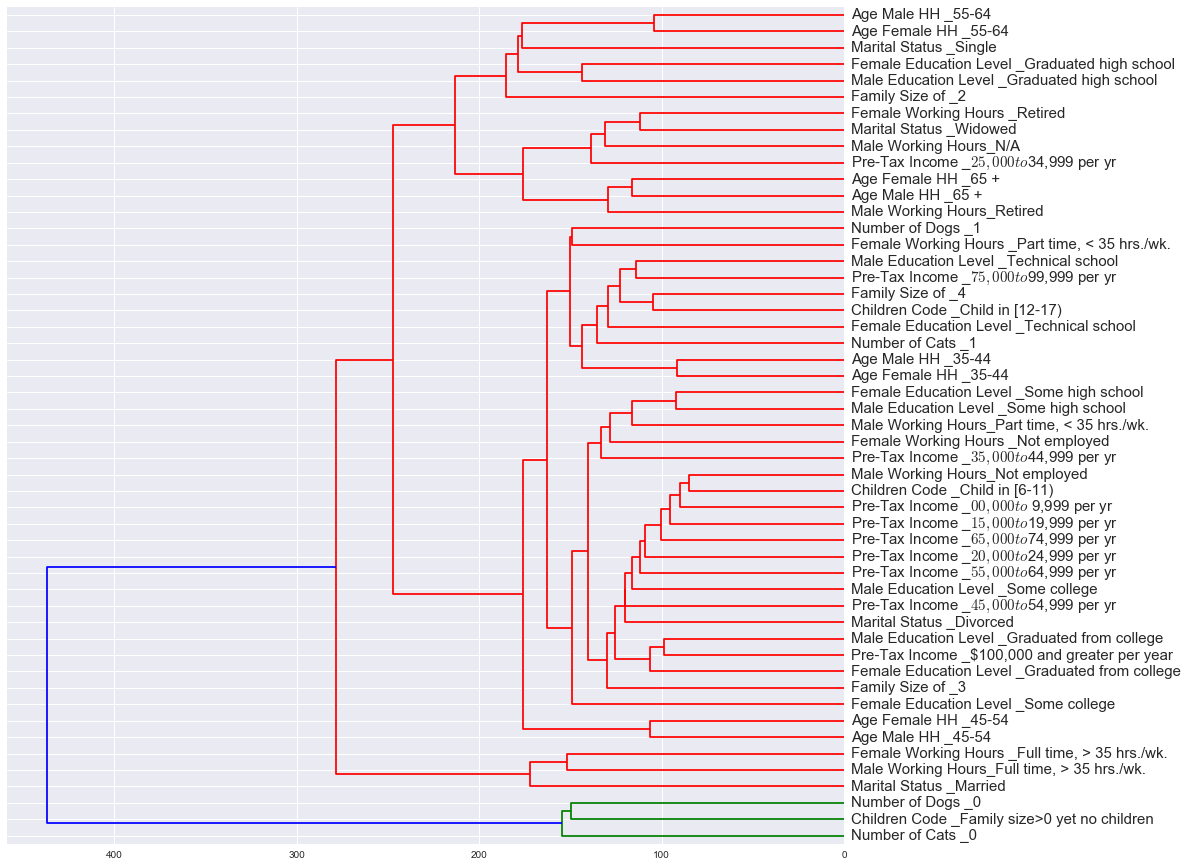

In [105]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib as mpl
hclust = linkage(pca_top_better_demo.T,method='ward');
mpl.rcParams['figure.figsize'] = 15,15;
dendrogram(hclust, orientation='left', labels=pca_top_better_demo.columns);
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=15)
plt.savefig('foo.png', bbox_inches='tight')
